In [41]:
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

In [42]:
iris = sns.load_dataset("iris")
iris = iris.drop(['petal_width', 'species'], axis=1)

In [43]:
print(iris)

     sepal_length  sepal_width  petal_length
0             5.1          3.5           1.4
1             4.9          3.0           1.4
2             4.7          3.2           1.3
3             4.6          3.1           1.5
4             5.0          3.6           1.4
..            ...          ...           ...
145           6.7          3.0           5.2
146           6.3          2.5           5.0
147           6.5          3.0           5.2
148           6.2          3.4           5.4
149           5.9          3.0           5.1

[150 rows x 3 columns]


In [44]:
class Zscore:

    def __init__(self, np_columns: np.ndarray):
        self.mean = np.nanmean(np_columns, axis=0)
        self.std_dev = np.nanstd(np_columns, axis=0)

    def get_score(self, x):
       return abs((x - self.mean) / self.std_dev)

    def get_average_score(self, x):
       return np.nanmean(self.get_score(x), axis=0)


In [45]:
# Filter numeric columns
numeric_columns = iris.select_dtypes(include=np.number)

In [46]:
# Initialize Zscore class for numeric columns
zscore_calculator = Zscore(numeric_columns.values)

In [47]:
zscore_results = {}

In [48]:
# Calculate z-score for each numeric column
for column in numeric_columns:
    column_values = numeric_columns[column].values
    column_values_without_nan = column_values[~np.isnan(column_values)]
    column_values_without_nan = column_values_without_nan[:, np.newaxis]  # Ensure column_values_without_nan is 2D
    column_zscore = zscore_calculator.get_score(column_values_without_nan)
    zscore_results[column] = column_zscore.flatten()  # Flatten to make it 1D

In [49]:
# Create DataFrame to display results
zscore_df = pd.DataFrame(zscore_results)
print(zscore_df.head())

   sepal_length  sepal_width  petal_length
0      0.900681     2.839367      5.383892
1      4.702153     1.019004      3.815128
2      0.762758     0.146641      1.340227
3      1.143017     3.445206      5.383892
4      4.241759     0.131979      3.815128


In [50]:
# Calculate aggregated z-score for each row
zscore_df['agg_z_score'] = zscore_df.mean(axis=1)

In [51]:
# Identify atypical data points
threshold = 3
atypical_indices = zscore_df[zscore_df['agg_z_score'] > threshold].index
if len(atypical_indices) < 5:
    atypical_indices = zscore_df['agg_z_score'].nlargest(10).index  # Choose 5-10 elements with highest aggregated z-score

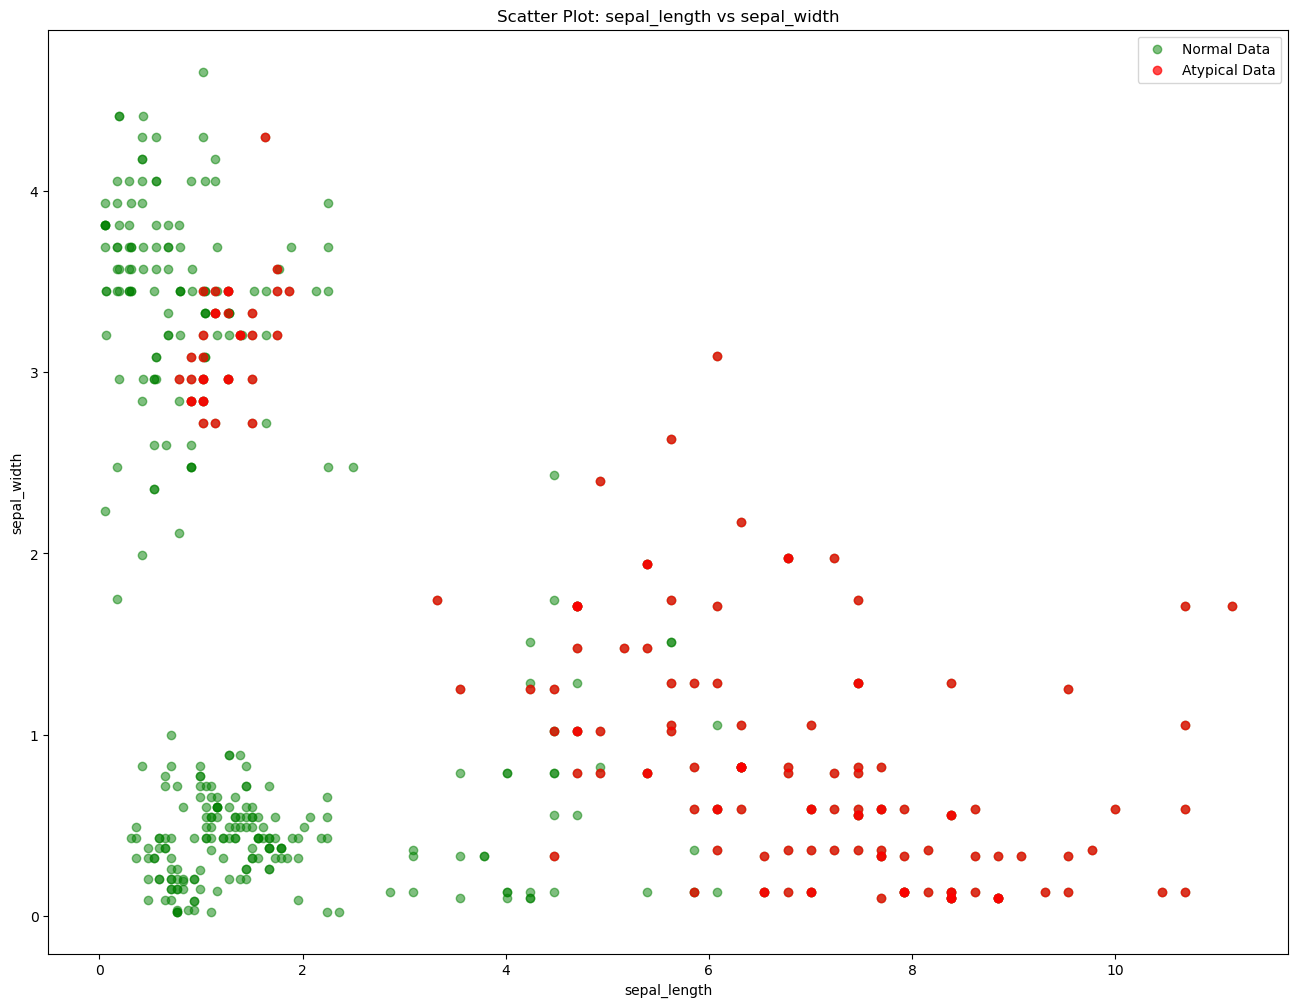

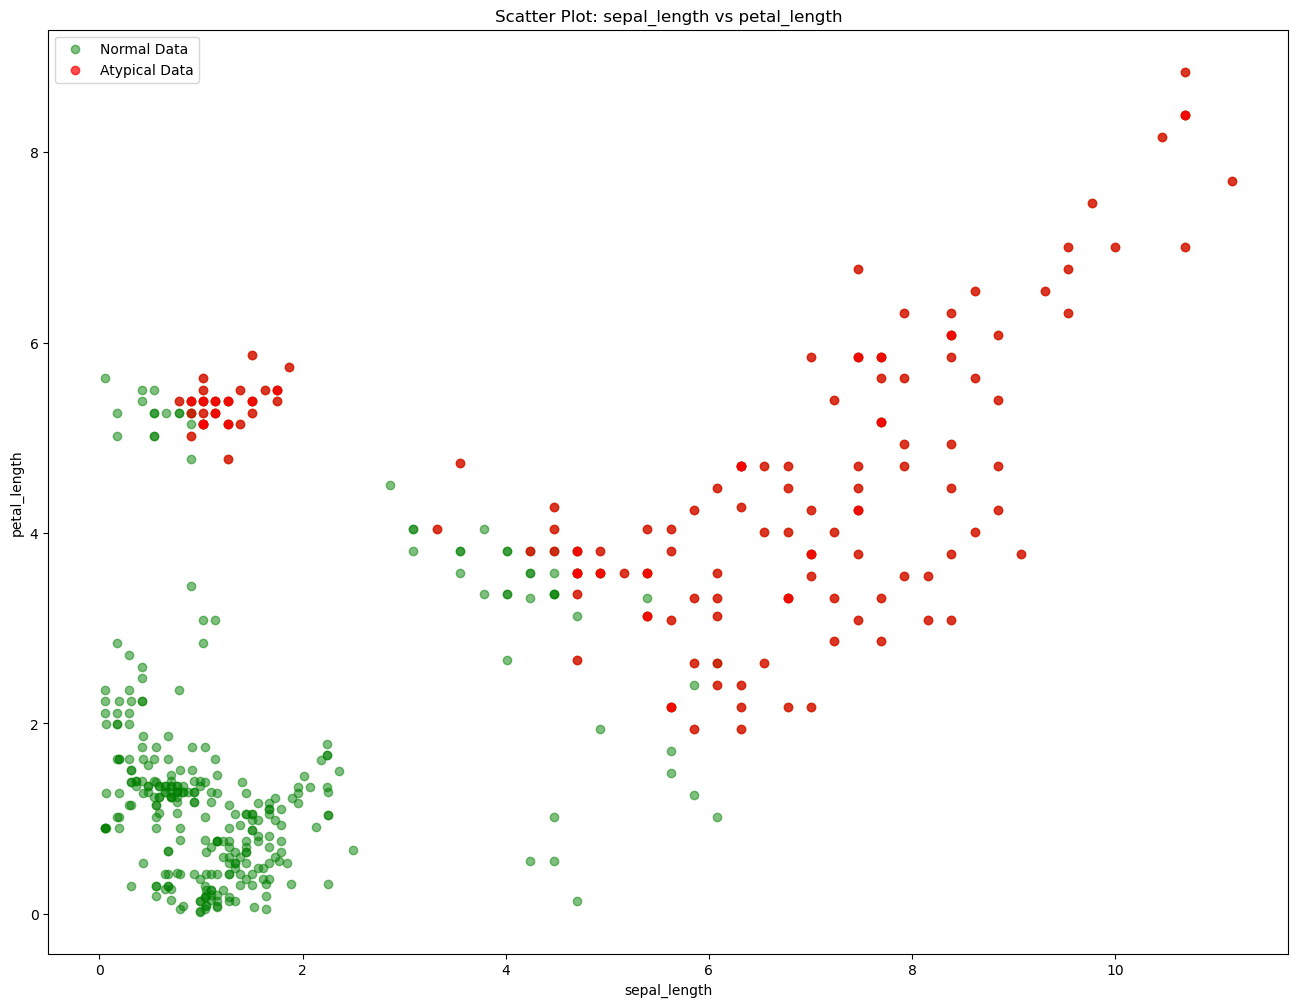

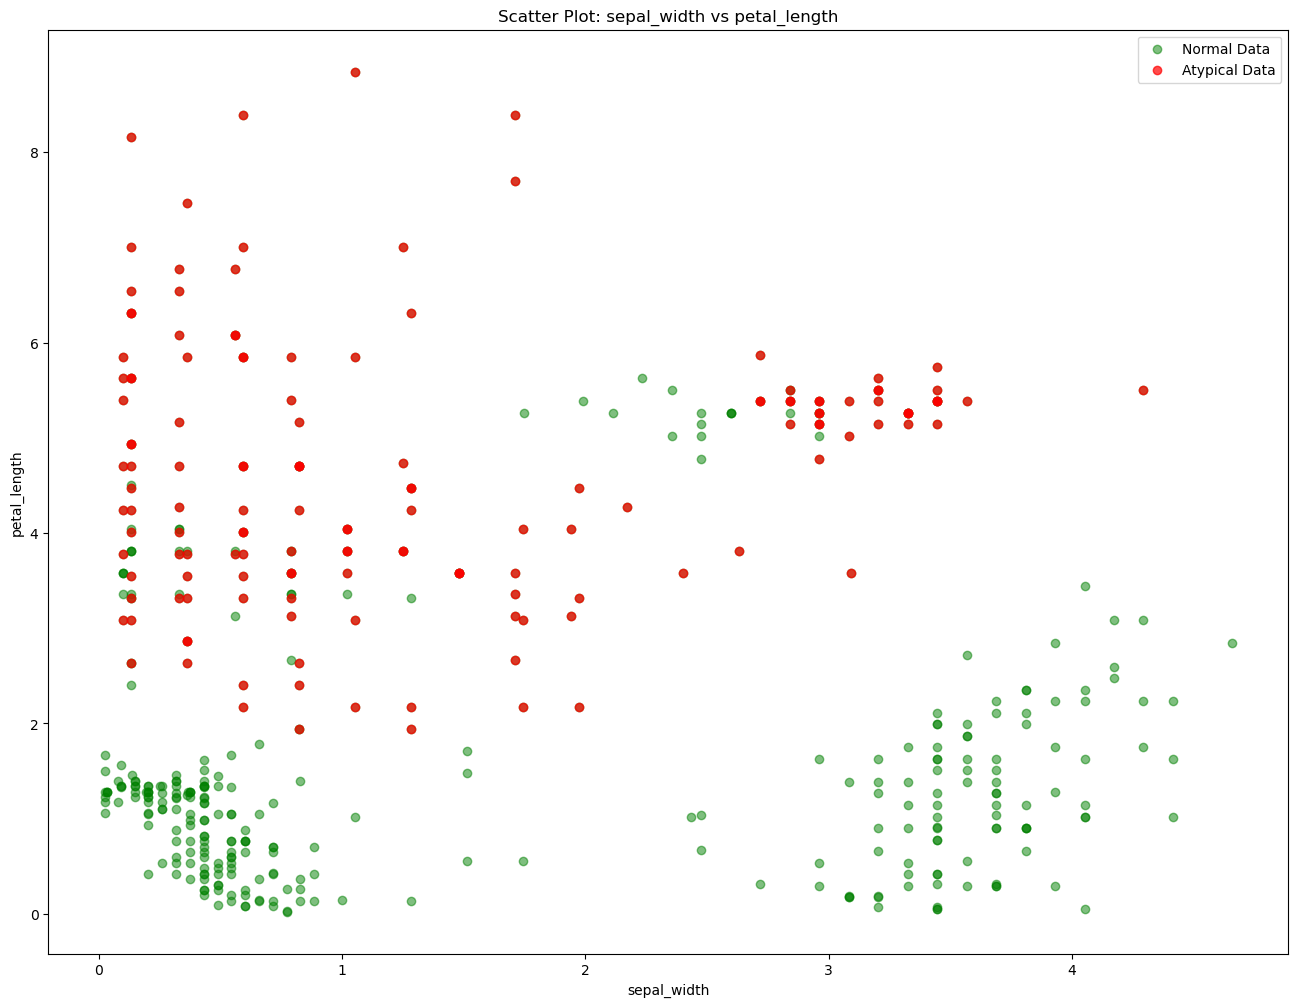

Atypical Data Points:
     sepal_length  sepal_width  petal_length  agg_z_score
0        0.900681     2.839367      5.383892     3.041314
1        4.702153     1.019004      3.815128     3.178762
3        1.143017     3.445206      5.383892     3.324039
6        1.385353     3.202871      5.505060     3.364428
9        1.506521     3.324039      5.262725     3.364428
..            ...          ...           ...          ...
436      8.385301     0.131979      4.932349     4.483210
439      7.464514     1.282963      4.471956     4.406478
442      7.924907     0.131979      4.932349     4.329745
445      7.234317     0.788808      5.392743     4.471956
448      6.543727     0.131979      4.702153     3.792620

[147 rows x 4 columns]


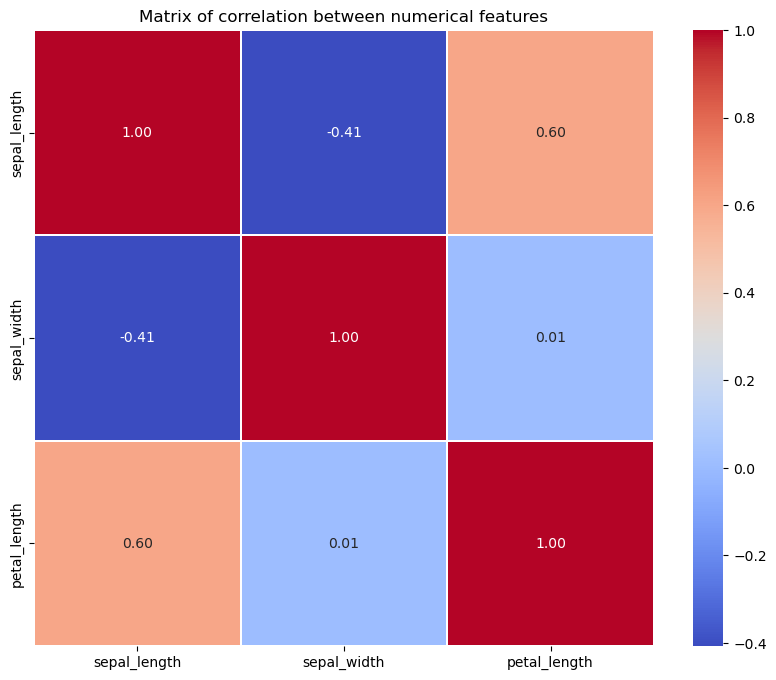

In [52]:
# Define numerical columns
numeric_columns = zscore_df.select_dtypes(include=np.number).columns

# Generate pairs of numerical columns
column_pairs = combinations(numeric_columns, 2)
 
# Visualize scatter plots for each column pair
for pair in column_pairs:
    if pair[0] != 'agg_z_score' and pair[1] != 'agg_z_score':
        plt.figure(figsize=(16, 12))

        # Scatter plot for normal data
        plt.scatter(zscore_df[pair[0]], zscore_df[pair[1]], color='green', alpha=0.5, label='Normal Data')

        # Scatter plot for atypical data
        plt.scatter(zscore_df.loc[atypical_indices, pair[0]], zscore_df.loc[atypical_indices, pair[1]],
                    color='red', alpha=0.7, label='Atypical Data')

        # Set labels and title
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.title(f'Scatter Plot: {pair[0]} vs {pair[1]}')
        plt.legend()
        plt.show()
 
# Display atypical data points
print("Atypical Data Points:")
print(zscore_df.iloc[atypical_indices])

# Calculate correlation matrix for numerical features
zscore_df = zscore_df.drop('agg_z_score', axis=1)
numerical_data = zscore_df.select_dtypes(include=np.number)
# numerical_data = numerical_data.drop(['agg_z_score'], errors='ignore')
correlation_matrix = numerical_data.corr()
 
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Matrix of correlation between numerical features')
plt.show()
